# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


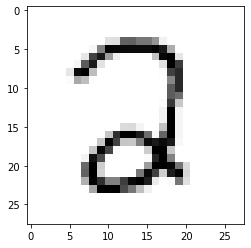

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2596328878930266
train accuracy is: 0.48890001669170424, test accuracy is 0.49294354838709675


Epoch 10 Loss 0.17084183979750156
train accuracy is: 0.8736437990318812, test accuracy is 0.8850806451612904


Epoch 20 Loss 0.08547319031038983
train accuracy is: 0.9177933567017192, test accuracy is 0.9274193548387096


Epoch 30 Loss 0.05631222249410096
train accuracy is: 0.9424970789517609, test accuracy is 0.9506048387096774


Epoch 40 Loss 0.043975019323377856
train accuracy is: 0.9525121014855616, test accuracy is 0.9586693548387096


Epoch 50 Loss 0.03771676154087536
train accuracy is: 0.9601068269070272, test accuracy is 0.9632056451612904


Epoch 60 Loss 0.033999234426141806
train accuracy is: 0.9630278751460524, test accuracy is 0.9672379032258065


Epoch 70 Loss 0.03149871978899694
train accuracy is: 0.9651143381739276, test accuracy is 0.9682459677419355


Epoch 80 Loss 0.02965066675048982
train accuracy is: 0.9661158404273076, test accuracy is 0.9682459677419355


Epoch 90 Loss 0.02819239673428685
train accuracy is: 0.9674511767651477, test accuracy is 0.969758064516129


Epoch 100 Loss 0.027005210664732236
train accuracy is: 0.9685361375396428, test accuracy is 0.9702620967741935


Epoch 110 Loss 0.02599180482326052
train accuracy is: 0.9700383909197129, test accuracy is 0.9692540322580645


Epoch 120 Loss 0.025101280352060256
train accuracy is: 0.970288766483058, test accuracy is 0.9692540322580645


Epoch 130 Loss 0.024320176670596806
train accuracy is: 0.9716241028208981, test accuracy is 0.969758064516129


Epoch 140 Loss 0.023624328910904057
train accuracy is: 0.9727090635953931, test accuracy is 0.9692540322580645


Epoch 150 Loss 0.02298516591935254
train accuracy is: 0.9730428976798531, test accuracy is 0.9707661290322581


Epoch 160 Loss 0.02239835948383623
train accuracy is: 0.9739609414121182, test accuracy is 0.9702620967741935


Epoch 170 Loss 0.02185972161159122
train accuracy is: 0.9740443999332332, test accuracy is 0.9702620967741935


Epoch 180 Loss 0.021342186645329542
train accuracy is: 0.9747120681021533, test accuracy is 0.9707661290322581


Epoch 190 Loss 0.020875397531924512
train accuracy is: 0.9755466533133033, test accuracy is 0.9707661290322581


Epoch 200 Loss 0.020432473528762683
train accuracy is: 0.9767985311300283, test accuracy is 0.9707661290322581


Epoch 210 Loss 0.02001623882804356
train accuracy is: 0.9773827407778334, test accuracy is 0.9707661290322581


Epoch 220 Loss 0.019613170767037932
train accuracy is: 0.9776331163411784, test accuracy is 0.9717741935483871


Epoch 230 Loss 0.019233498870540343
train accuracy is: 0.9781338674678685, test accuracy is 0.9727822580645161


Epoch 240 Loss 0.018865741590701885
train accuracy is: 0.9787180771156735, test accuracy is 0.9727822580645161


0.0714349330268895

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2489057925055257
train accuracy is: 0.6439659489233851, test accuracy is 0.6522177419354839


Epoch 10 Loss 0.10714054264274052
train accuracy is: 0.8977633116341178, test accuracy is 0.9067540322580645


Epoch 20 Loss 0.08151323369386806
train accuracy is: 0.9237189117008847, test accuracy is 0.9329637096774194


Epoch 30 Loss 0.06971533402748169
train accuracy is: 0.9342346853613754, test accuracy is 0.9455645161290323


Epoch 40 Loss 0.06265559157015879
train accuracy is: 0.9396594892338508, test accuracy is 0.9516129032258065


Epoch 50 Loss 0.05787031309881482
train accuracy is: 0.943748956768486, test accuracy is 0.9556451612903226


Epoch 60 Loss 0.054372747168117845
train accuracy is: 0.9465865464863963, test accuracy is 0.9576612903225806


Epoch 70 Loss 0.051683229099705075
train accuracy is: 0.9488399265565014, test accuracy is 0.9591733870967742


Epoch 80 Loss 0.0495363073275933
train accuracy is: 0.9503421799365716, test accuracy is 0.9616935483870968


Epoch 90 Loss 0.04777251111023321
train accuracy is: 0.9512602236688366, test accuracy is 0.9621975806451613


Epoch 100 Loss 0.046291647353260516
train accuracy is: 0.9529293940911367, test accuracy is 0.9632056451612904


Epoch 110 Loss 0.04502655361986494
train accuracy is: 0.9538474378234018, test accuracy is 0.9642137096774194


Epoch 120 Loss 0.043928363486716394
train accuracy is: 0.9551827741612419, test accuracy is 0.9642137096774194


Epoch 130 Loss 0.04296525124462554
train accuracy is: 0.956100817893507, test accuracy is 0.9647177419354839


Epoch 140 Loss 0.04210890537875909
train accuracy is: 0.956935403104657, test accuracy is 0.9657258064516129


Epoch 150 Loss 0.04134316449202305
train accuracy is: 0.957269237189117, test accuracy is 0.9657258064516129


Epoch 160 Loss 0.04065262865935726
train accuracy is: 0.9579369053580371, test accuracy is 0.9657258064516129


Epoch 170 Loss 0.04002499419515784
train accuracy is: 0.958604573526957, test accuracy is 0.9657258064516129


Epoch 180 Loss 0.039451876155261904
train accuracy is: 0.9589384076114171, test accuracy is 0.9657258064516129


Epoch 190 Loss 0.03892433342200127
train accuracy is: 0.9590218661325322, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.03843842932321377
train accuracy is: 0.9594391587381071, test accuracy is 0.9657258064516129


Epoch 210 Loss 0.03798865426683657
train accuracy is: 0.9600233683859122, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.037568923366698405
train accuracy is: 0.9601902854281422, test accuracy is 0.9662298387096774


Epoch 230 Loss 0.03717794674220126
train accuracy is: 0.9606075780337172, test accuracy is 0.9662298387096774


Epoch 240 Loss 0.03681199849197306
train accuracy is: 0.9608579535970623, test accuracy is 0.9672379032258065


0.01776147848840069

### Comparing results of NN and LR

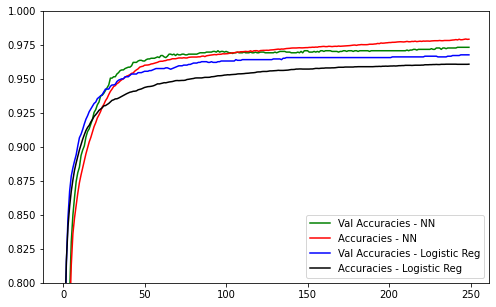

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

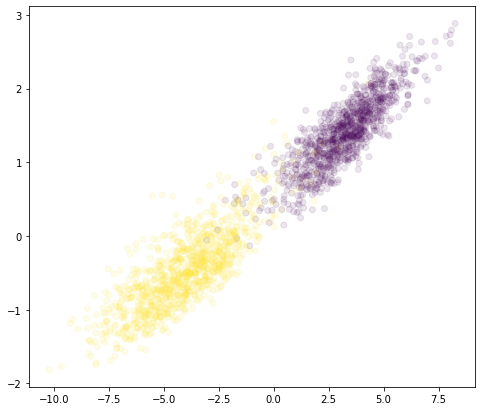

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

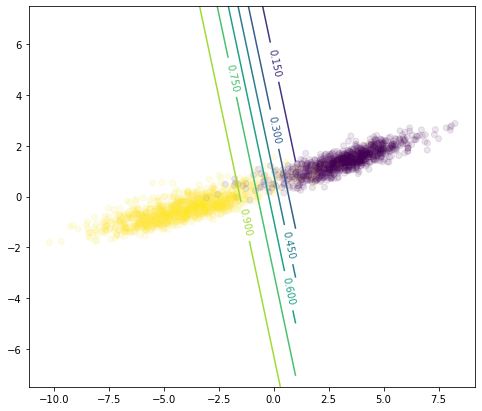

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );